In [14]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the customer data
file_path = '../data/processed/customer_data.csv'
df = pd.read_csv(file_path)

# Preview the data
df.head()

,CustomerID,NumPurchases,TotalQuantity,TotalPrice
0,12346.0,1,74215,77183.60
1,12347.0,7,2458,4310.00
2,12348.0,4,2341,1797.24
3,12349.0,1,631,1757.55
4,12350.0,1,197,334.40


In [15]:
# Check for missing values
(df.isnull().sum())

# Drop any remaining missing values
df.dropna(inplace=True)

# Features to be used for clustering
features = ['NumPurchases', 'TotalQuantity', 'TotalPrice']

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Preview the scaled data
scaled_data[:5]

array([[-0.4250965 , 14.47303784,  8.35866818],
       [ 0.3544168 ,  0.25105757,  0.25096626],
       [-0.03533985,  0.22786859, -0.02859601],
       [-0.4250965 , -0.11104729, -0.0330118 ],
       [-0.4250965 , -0.19706453, -0.19134727]])

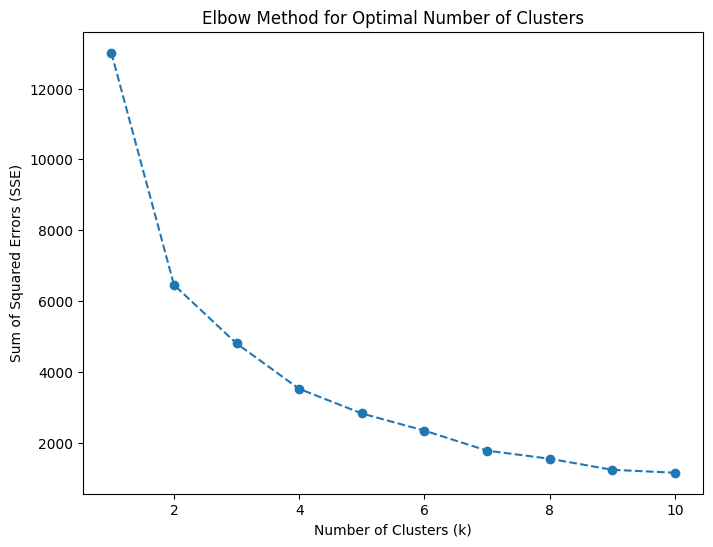

In [21]:
# Using the elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the SSE for the elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

# Save the plot as a JPG file in the images folder
plt.savefig('../images/elbow_method.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [17]:
# Based on the elbow plot, let's assume k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original dataframe
df['Cluster'] = clusters

# Preview the data with clusters
df.head()

,CustomerID,NumPurchases,TotalQuantity,TotalPrice,Cluster
0,12346.0,1,74215,77183.60,1
1,12347.0,7,2458,4310.00,0
2,12348.0,4,2341,1797.24,0
3,12349.0,1,631,1757.55,0
4,12350.0,1,197,334.40,0


In [18]:
# Silhouette score evaluation
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.812


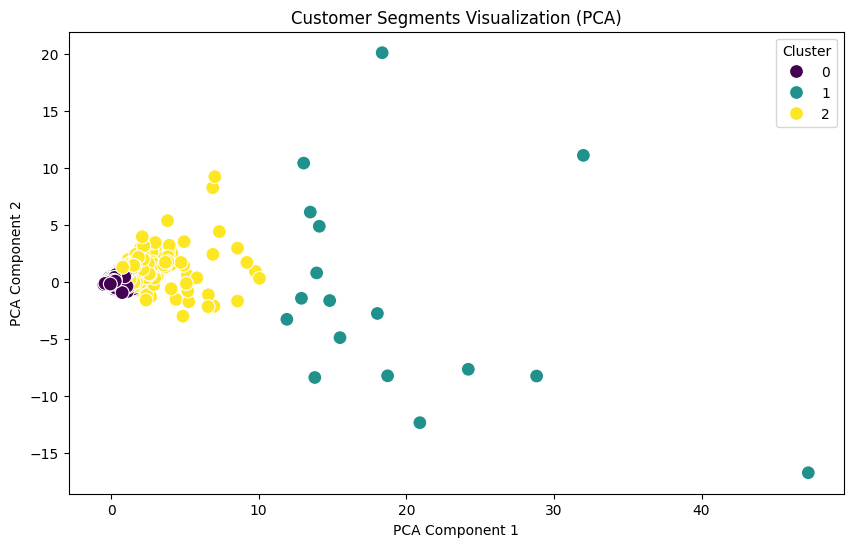

In [22]:
# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Adding PCA components to the dataframe
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Save the plot as a JPG file in the images folder
plt.savefig('../images/customer_segments_pca.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [20]:
# Aggregating the data by cluster to analyze each segment
cluster_summary = df.groupby('Cluster').agg({
    'NumPurchases': ['mean', 'std'],
    'TotalQuantity': ['mean', 'std'],
    'TotalPrice': ['mean', 'std']
}).reset_index()

cluster_summary.columns = ['Cluster', 'AvgPurchases', 'StdPurchases', 'AvgQuantity', 'StdQuantity', 'AvgPrice', 'StdPrice']
cluster_summary

,Cluster,AvgPurchases,StdPurchases,AvgQuantity,StdQuantity,AvgPrice,StdPrice
0,0,3.072319,2.591370,649.209382,820.574387,1091.627050,1301.237527
1,1,70.352941,60.037427,64501.000000,38929.971954,112694.244706,74351.721027
2,2,20.881579,11.269975,6202.109649,6069.824010,11085.860658,10407.132540


### Insights:
1. **Cluster 0**: Customers in this segment tend to have the highest average purchases and total quantity bought, representing the business's most engaged buyers.
2. **Cluster 1**: This group consists of customers with moderate purchases and quantity, likely representing medium-level buyers.
3. **Cluster 2**: The smallest segment in terms of purchases and quantity bought, potentially representing occasional or low-value customers.

### Actions:
- **Cluster 0**: These customers could be targeted with loyalty programs or premium offerings.
- **Cluster 1**: Offering incentives such as discounts or exclusive offers might increase their engagement.
- **Cluster 2**: Marketing strategies should focus on encouraging these customers to purchase more frequently.

- Further refine the customer segmentation using additional features such as recency of purchases (RFM analysis).
- Explore other clustering algorithms (e.g., Agglomerative Clustering or DBSCAN) for comparison.
- Integrate cluster information into business analytics tools for targeted marketing strategies.